This is a practice notebook meant to understand linear mixed effect models. This material has been borrowed from the site http://sia.webpopix.org/lme.html. 

## Data

In [1]:
library(nlme)
library(repr)

options(repr.plot.width = 6, repr.plot.height = 3.5)

In [2]:
data("Orthodont", package = "nlme")
head(Orthodont)

distance,age,Subject,Sex
26.0,8,M01,Male
25.0,10,M01,Male
29.0,12,M01,Male
31.0,14,M01,Male
21.5,8,M02,Male
22.5,10,M02,Male


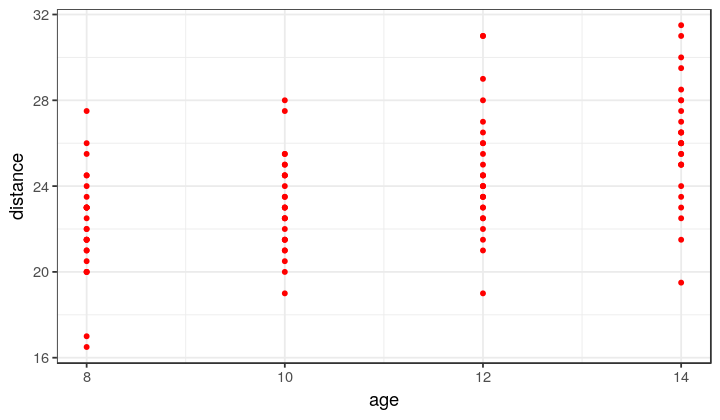

In [3]:
library(ggplot2)
theme_set(theme_bw())

pl <- ggplot(data = Orthodont) + geom_point(aes(x = age, y = distance), color = "red", size = 1) 
pl

## Linear Models

### Linear Model 1

The distance is regressed against age.

In [4]:
lm1 <- lm(distance ~ age, data = Orthodont)
summary(lm1)


Call:
lm(formula = distance ~ age, data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5037 -1.5778 -0.1833  1.3519  6.3167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.7611     1.2256  13.676  < 2e-16 ***
age           0.6602     0.1092   6.047 2.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.537 on 106 degrees of freedom
Multiple R-squared:  0.2565,	Adjusted R-squared:  0.2495 
F-statistic: 36.56 on 1 and 106 DF,  p-value: 2.248e-08


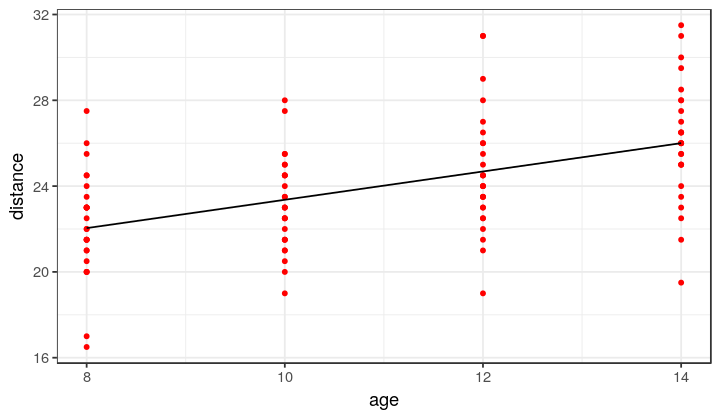

In [5]:
 pl + geom_line(aes(x = age, y = predict(lm1)))

### Plot separately for boys and girls

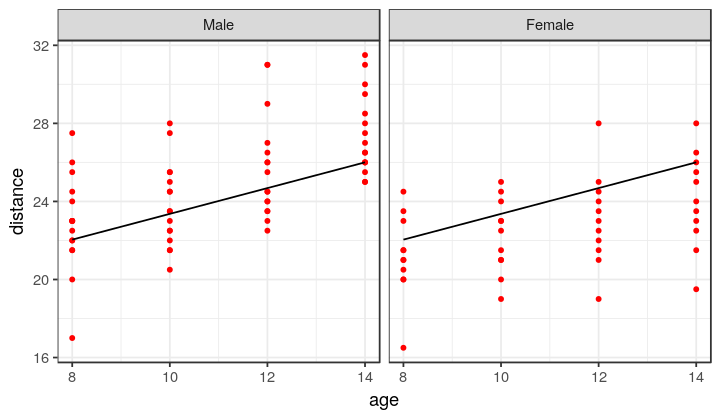

In [6]:
pl + geom_line(aes(x = age,y = predict(lm1))) + facet_grid( .~ Sex )

### Linear Model 2

Assume different intercepts for both boys and girls but the same slope. 

$$
    y_j = c_0 + d_0 \cdot \mathbf{I}_{F j} + c_1 \cdot \mbox{age}_j + \epsilon_j 
$$
where $ \mathbf{I}_{F j}$ is a binary variable with value $1$ iff the $j$th data point refers to a girl. 

In [7]:
lm2 <- lm(distance ~ age + Sex, data = Orthodont)
summary(lm2)


Call:
lm(formula = distance ~ age + Sex, data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9882 -1.4882 -0.0586  1.1916  5.3711 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.70671    1.11221  15.920  < 2e-16 ***
age          0.66019    0.09776   6.753 8.25e-10 ***
SexFemale   -2.32102    0.44489  -5.217 9.20e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.272 on 105 degrees of freedom
Multiple R-squared:  0.4095,	Adjusted R-squared:  0.3983 
F-statistic: 36.41 on 2 and 105 DF,  p-value: 9.726e-13


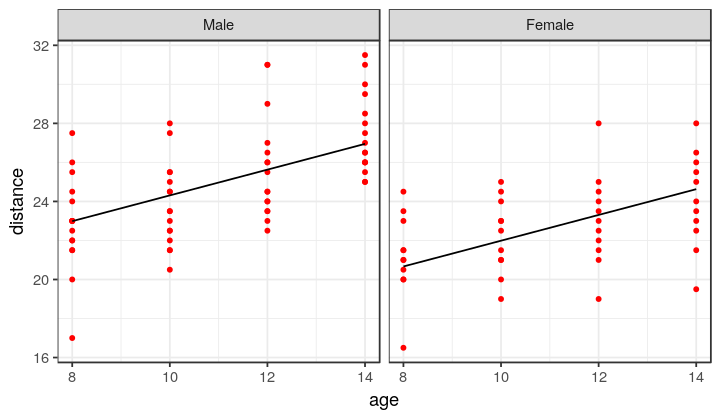

In [8]:
Orthodont$pred.lm2 <- predict(lm2)
pl + geom_line(data = Orthodont, aes(x = age, y = pred.lm2)) + facet_grid( .~ Sex )

### Linear Model 3

The intercept is the same but the slopes are different for boys and girls.

$$
     y_j = c_0 + c_{1 M} \cdot \mathbf{I}_{M j} \cdot \mbox{age}_j + c_{1 F} \cdot \mathbf{I}_{F j} \cdot \mbox{age}_j + \epsilon_j 
$$
where $\mathbf{I}_{M j} = 1$ iff $y_j$ refers to a boy and $\mathbf{I}_{F j} = 1$ iff $y_j$ refers to a girl.

In [9]:
lm3 <- lm(distance ~ age : Sex, data = Orthodont)
summary(lm3)


Call:
lm(formula = distance ~ age:Sex, data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7424 -1.2424 -0.1893  1.2681  5.2669 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.76111    1.08613  15.432  < 2e-16 ***
age:SexMale    0.74767    0.09807   7.624 1.16e-11 ***
age:SexFemale  0.53294    0.09951   5.355 5.07e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.249 on 105 degrees of freedom
Multiple R-squared:  0.4215,	Adjusted R-squared:  0.4105 
F-statistic: 38.26 on 2 and 105 DF,  p-value: 3.31e-13


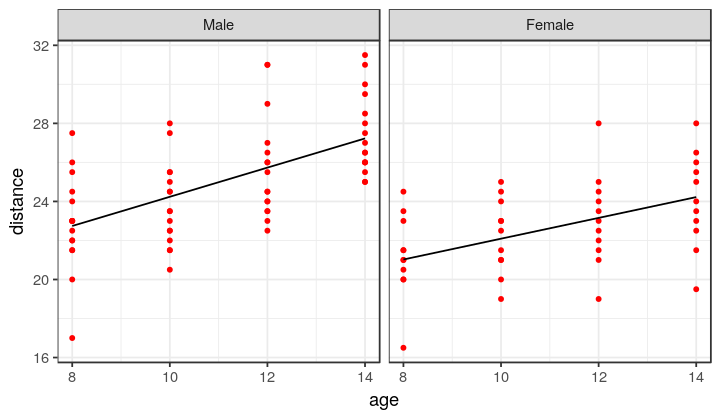

In [10]:
Orthodont$pred.lm3 <- predict(lm3)
pl + geom_line(data = Orthodont, aes(x = age, y = pred.lm3)) + facet_grid( .~ Sex )

### Linear Model 4

Different slopes and intercepts for boys and girls.

$$
    y_j = c_0 +  d_0 \cdot \mathbf{I}_{F j} + c_{1 M} \cdot \mathbf{I}_{M j} \cdot \mbox{age}_j + c_{1 F} \cdot \mathbf{I}_{F j} \cdot \mbox{age}_j + \epsilon_j 
$$

In [11]:
lm4 <- lm(distance ~ age:Sex + Sex, data = Orthodont)
summary(lm4)


Call:
lm(formula = distance ~ age:Sex + Sex, data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6156 -1.3219 -0.1682  1.3299  5.2469 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    16.3406     1.4162  11.538  < 2e-16 ***
SexFemale       1.0321     2.2188   0.465  0.64279    
age:SexMale     0.7844     0.1262   6.217 1.07e-08 ***
age:SexFemale   0.4795     0.1522   3.152  0.00212 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.257 on 104 degrees of freedom
Multiple R-squared:  0.4227,	Adjusted R-squared:  0.4061 
F-statistic: 25.39 on 3 and 104 DF,  p-value: 2.108e-12


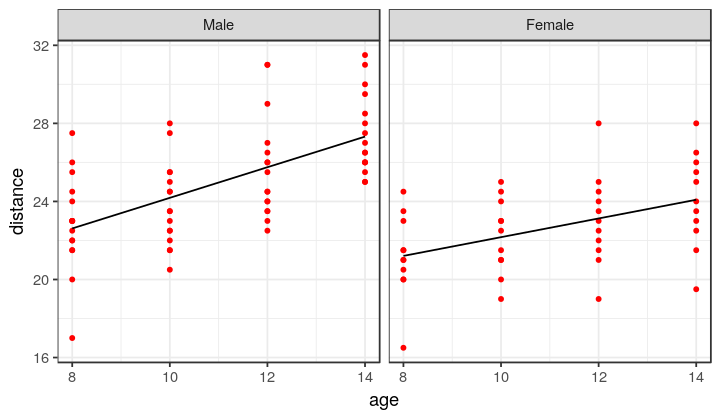

In [12]:
Orthodont$pred.lm4 <- predict(lm4)
pl + geom_line(data = Orthodont, aes(x = age, y = pred.lm4)) + facet_grid( .~ Sex )

### Which is the best model?

In [13]:
BIC(lm1, lm2, lm3, lm4)

,df,BIC
lm1,3,519.6234
lm2,4,499.4121
lm3,4,497.1948
lm4,5,501.6524


The BIC criterion is lowest for model 3 and hence model 3 seems to be the best. We next examine individual fits for model 3 

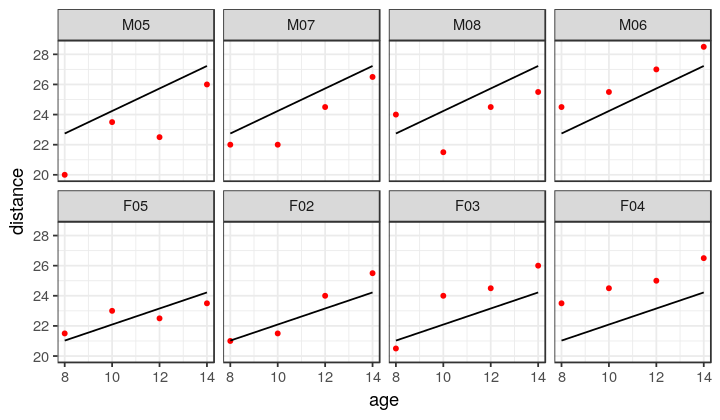

In [14]:
Subject.select <- c(paste0("M0", 5:8), paste0("F0", 2:5))

Orthodont.select <- subset(Orthodont, Subject %in% Subject.select)

ggplot(data = Orthodont.select) + 
geom_point(aes(x = age, y = distance), color = "red", size = 1) + 
geom_line(aes(x = age, y = predict(lm3, newdata = Orthodont.select))) + facet_wrap( ~Subject, nrow = 2 ) 

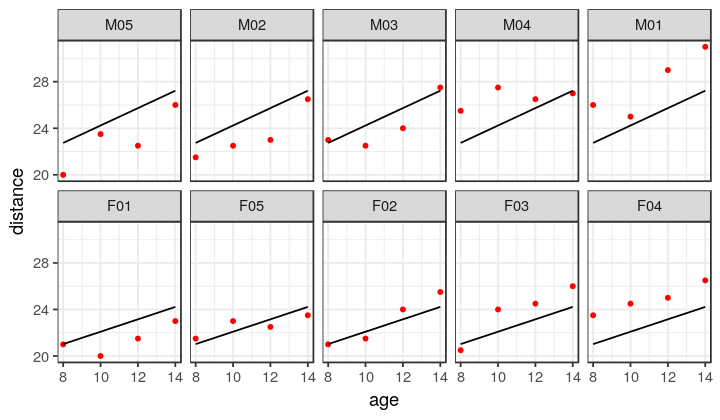

In [15]:
Subject.select <- c(paste0("M0", 1:5), paste0("F0", 1:5))

Orthodont.select <- subset(Orthodont, Subject %in% Subject.select)

ggplot(data = Orthodont.select) + 
geom_point(aes(x = age, y = distance), color = "red", size = 1) + 
geom_line(aes(x = age, y = predict(lm3, newdata = Orthodont.select))) + facet_wrap( ~Subject, nrow = 2 ) 

The above plots indicate that sex-specific slopes and intercepts do not seem to exhibit good individual-specific fits. A reason for this is that we did not take into account that the data are repeated measurements made on the same subject. If we connect the data points for each individual by line segments, we get:

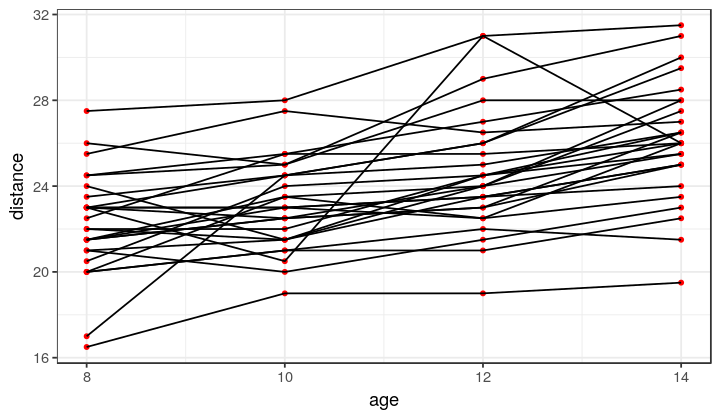

In [16]:
library(ggplot2)
theme_set(theme_bw())

ggplot(data = Orthodont) + geom_point(aes(x = age, y = distance), color = "red", size = 1)  + 
geom_line(aes(x = age, y = distance, group = Subject)) 

This clearly shows that the slopes and intercepts vary from individual to individual even among the same sex. 